# Text-guided image-inpainting

The [StableDiffusionInpaintPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/inpaint#diffusers.StableDiffusionInpaintPipeline) allows you to edit specific parts of an image by providing a mask and a text prompt. It uses a version of Stable Diffusion, like [`runwayml/stable-diffusion-inpainting`](https://huggingface.co/runwayml/stable-diffusion-inpainting) specifically trained for inpainting tasks.

Get started by loading an instance of the [StableDiffusionInpaintPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/inpaint#diffusers.StableDiffusionInpaintPipeline):

Create masking


In [32]:
!git clone https://github.com/wildoctopus/huggingface-cloth-segmentation.git

Cloning into 'huggingface-cloth-segmentation'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 28 (delta 6), reused 6 (delta 6), pack-reused 18 (from 1)
Receiving objects: 100% (28/28), 1.96 MiB | 35.87 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [3]:
%cd huggingface-cloth-segmentation

/content/huggingface-cloth-segmentation


In [41]:
!ls

app.py	assets	input  LICENSE	network.py  options.py	process.py  README.md  requirements.txt


In [ ]:
!pip install -r requirements.txt

In [12]:
!python process.py --image "/content/shashi.jpg"

Model already exists.
/content/huggingface-cloth-segmentation/process.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_state_dict = torch.load(checkpoint_path, map

#TEXT IAMGE INPAINTING

In [6]:
import PIL
import requests
import torch
from io import BytesIO

from diffusers import StableDiffusionInpaintPipeline

pipeline = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16,
)
pipeline = pipeline.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
vae/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280ae

Download an image and a mask of a dog which you'll eventually replace:

In [2]:
def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")


img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
mask_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"

init_image = download_image(img_url).resize((512, 512))
mask_image = download_image(mask_url).resize((512, 512))

In [7]:
init_image = PIL.Image.open('/content/test.jpg').convert("RGB").resize((512, 512))
# init_image
mask_image = PIL.Image.open('/content/huggingface-cloth-segmentation/output/alpha/1.png').convert("RGB").resize((512, 512))

In [11]:
from diffusers.utils import load_image, make_image_grid

Now you can create a prompt to replace the mask with something else:

  0%|          | 0/50 [00:00<?, ?it/s]

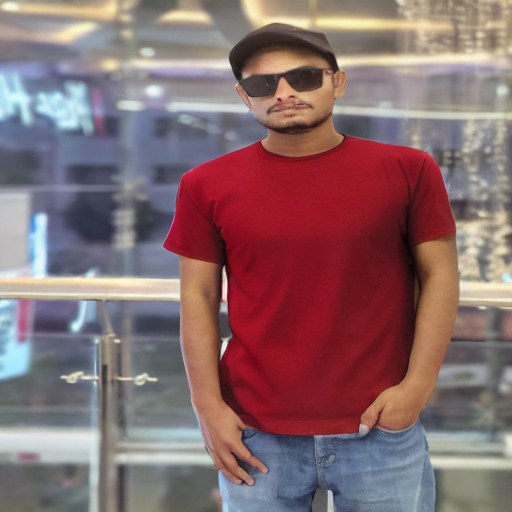

In [10]:
prompt = "ful sleeve red tshirt"
image = pipeline(prompt=prompt, image=init_image, mask_image=mask_image).images
image[0]
# make_image_grid([image[0],image[1],image[2]], rows=1, cols=3)

In [15]:
pipeline(prompt=prompt, image=init_image, mask_image=mask_image)

  0%|          | 0/50 [00:00<?, ?it/s]

StableDiffusionPipelineOutput(images=[<PIL.Image.Image image mode=RGB size=512x512 at 0x7858B18B2D70>], nsfw_content_detected=[False])

`image`          | `mask_image` | `prompt` | output |
:-------------------------:|:-------------------------:|:-------------------------:|-------------------------:|
<img src="https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png" alt="drawing" width="250"/> | <img src="https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png" alt="drawing" width="250"/> | ***Face of a yellow cat, high resolution, sitting on a park bench*** | <img src="https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/in_paint/yellow_cat_sitting_on_a_park_bench.png" alt="drawing" width="250"/> |


<Tip warning={true}>

A previous experimental implementation of inpainting used a different, lower-quality process. To ensure backwards compatibility, loading a pretrained pipeline that doesn't contain the new model will still apply the old inpainting method.

</Tip>

Check out the Spaces below to try out image inpainting yourself!

<iframe
	src="https://runwayml-stable-diffusion-inpainting.hf.space"
	frameborder="0"
	width="850"
	height="500"
></iframe>

# `Image to image inpainting`

In [26]:
import torch
from diffusers import AutoPipelineForInpainting, AutoPipelineForImage2Image
from diffusers.utils import load_image, make_image_grid

pipeline = AutoPipelineForInpainting.from_pretrained(
    "runwayml/stable-diffusion-inpainting", torch_dtype=torch.float16, variant="fp16"
)
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
# pipeline.enable_xformers_memory_efficient_attention()

# load base and mask image
init_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint.png")
mask_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint_mask.png")

prompt = "concept art digital painting of an elven castle, inspired by lord of the rings, highly detailed, 8k"
image_inpainting = pipeline(prompt=prompt, image=init_image, mask_image=mask_image).images[0]

# resize image to 1024x1024 for SDXL
image_inpainting = image_inpainting.resize((1024, 1024))

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [28]:
pipeline = AutoPipelineForInpainting.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0", torch_dtype=torch.float16, variant="fp16"
)
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
# pipeline.enable_xformers_memory_efficient_attention()

image = pipeline(prompt=prompt, image=image_inpainting, mask_image=mask_image, output_type="latent").images[0]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

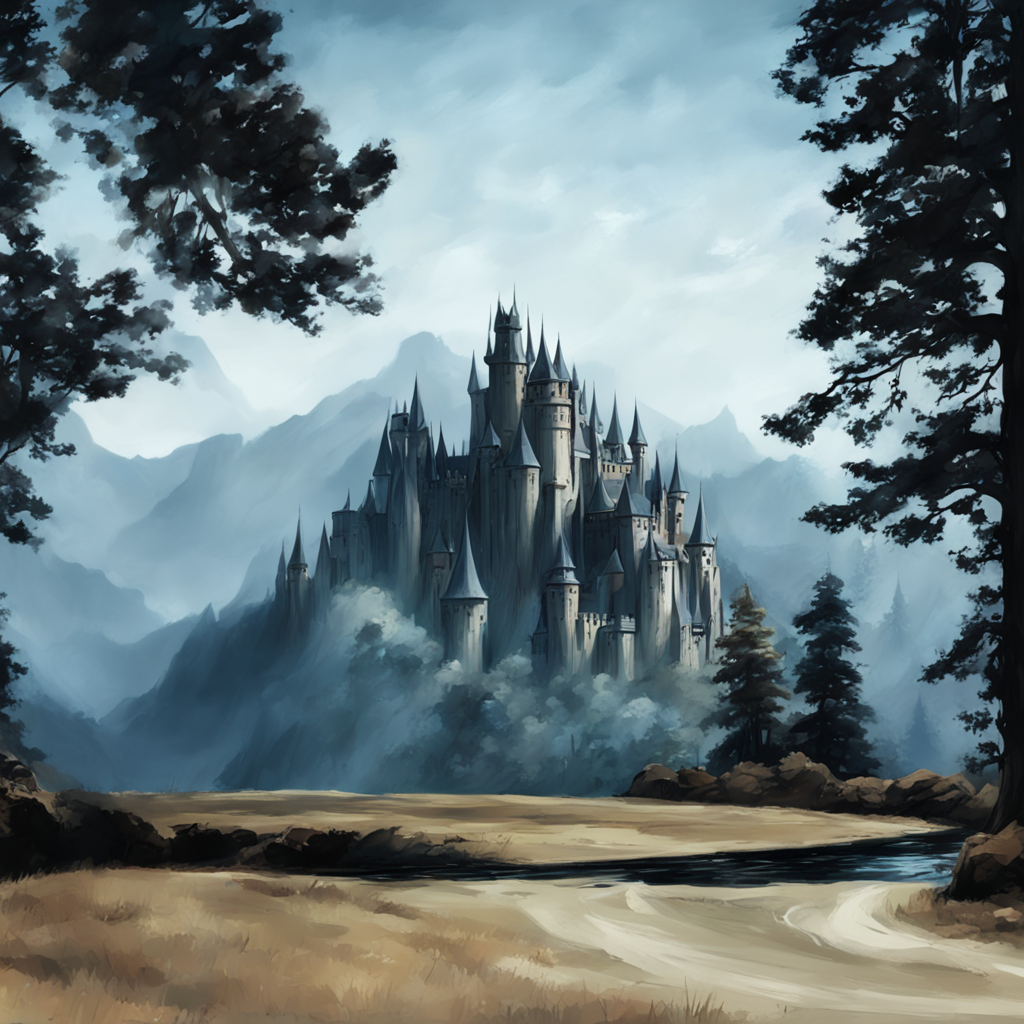

In [31]:
pipeline = AutoPipelineForImage2Image.from_pipe(pipeline)
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
# pipeline.enable_xformers_memory_efficient_attention()

image = pipeline(prompt=prompt, image=image).images[0]
# make_image_grid([init_image, mask_image, image_inpainting, image], rows=2, cols=2)
image